## All the data preparation & preprocessing techniques
- scaling numeric features (for time efficiency)
- dealing with unusual | missing values | sparse matrices
- turning qualitative features to numeric
- converting non-linear relationships to linear

*This notebook contains key ideas from <a href="https://www.amazon.com/Regression-Analysis-Python-Luca-Massaron/dp/1785286315">Regression Analysis with Python</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import load_boston
from sklearn import linear_model as lm
import statsmodels.api as sm

%matplotlib inline
sns.set()

# Numeric Feature Scaling

Important to apply when working with gradient descent-based algorithms for quicker convergence.

In [2]:
# set the default numbers after comma
np.set_printoptions(precision=5, suppress=True)

data = load_boston()
boston = pd.DataFrame(data.data, columns=data.feature_names)
boston['Price'] = data.target

observations = len(boston)
X = boston.iloc[:, :-1]
y = boston.iloc[:, -1]

In [3]:
# transform the target into binary to do Logistic Regression
yq = np.array(y > 25, dtype=int)


### Mean Centering: StandardScaler & MinMaxScaler
- StandardScaler scales the variables by removing the mean & centering it around (0, 0) origin. Range: [-3, 3]
- MinMaxScaler scales the variables by your specified min & max values.

### Important!
If you reuse one of the two classes, after being trained, on other new data, the new
variables might have different maximum and minimum values, causing the resulting
transformed variables to be off-scale (above maximum or below minimum, or with an
anomalous value). When this happens, it is important to check if the new data has
anomalous values and question whether we used the correct data for the training phase
when we defined the transformations and the coefficients.

In [4]:
linreg = lm.LinearRegression(normalize=False, fit_intercept=True).fit(X, y)
print(f'coefficients: {linreg.coef_}, {linreg.intercept_}')


coefficients: [ -0.10801   0.04642   0.02056   2.68673 -17.76661   3.80987   0.00069
  -1.47557   0.30605  -0.01233  -0.95275   0.00931  -0.52476], 36.45948838509001


In [5]:
# double-check with statsmodels
linear_regression = sm.OLS(endog=y, exog=X).fit()
print(linear_regression.params)
linear_regression.summary()


CRIM      -0.092897
ZN         0.048715
INDUS     -0.004060
CHAS       2.853999
NOX       -2.868436
RM         5.928148
AGE       -0.007269
DIS       -0.968514
RAD        0.171151
TAX       -0.009396
PTRATIO   -0.392191
B          0.014906
LSTAT     -0.416304
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Sat, 20 Mar 2021   Prob (F-statistic):                        0.00
Time:                        10:14:14   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0929      0.034     -2.699      0.007      -0.161      -0.025
ZN             0.0487      0.014      3.382      0.001       0.020       0.077
INDUS         -0.0041      0.064     -0.063      0.950      -0.131       0.123
CHAS           2.8540      0.904      3.157      0.002       1.078       4.630
NOX           -2.8684      3.359     -0.854      0.394      -9.468       3.731
RM             5.9281      0.309     19.178      0.000       5.321       6.535
AGE           -0.0073      0.014     -0.526      0.599      -0.034       0.020
DIS           -0.9685      0.196     -4.951      0.000      -1.353      -0.584
RAD            0.1712      0.067      2.564      0.011       0.040       0.302
TAX           -0.0094      0.004     -2.395      0.017      -0.017      -0.002
PTRATIO       -0.3922      0.110     -3.570      0.000      -0.608      -0.176
B              0.0149      0.003      5.528      0.000       0.010       0.020
LSTAT         -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
# difference in intercept!
scaler = StandardScaler(with_mean=True, with_std=False)
linreg.fit(scaler.fit_transform(X), y)
print(f'coefficients: {linreg.coef_}, {linreg.intercept_}')
print('============')
print(f'Mean of price: {np.mean(y)}')
print(f'LinReg intercept: {linreg.intercept_}')

coefficients: [ -0.10801   0.04642   0.02056   2.68673 -17.76661   3.80987   0.00069
  -1.47557   0.30605  -0.01233  -0.95275   0.00931  -0.52476], 22.532806324110688
Mean of price: 22.532806324110677
LinReg intercept: 22.532806324110688


### When there are missing values, it'll automatically tend to be the mean (22.53)
Since missing values can be written as 0, they'll automatically convert to the mean!
It's not necessary to scale the target variable, the only case to do so if it creates an overflow

In [7]:
# standardization with both mean and std
scaler = StandardScaler(with_mean=True, with_std=True)
linreg.fit(scaler.fit_transform(X), y)
print(f'coefficients: {linreg.coef_}, {linreg.intercept_}')

coefficients: [-0.92815  1.08157  0.1409   0.68174 -2.05672  2.67423  0.01947 -3.10404
  2.66222 -2.07678 -2.06061  0.84927 -3.74363], 22.532806324110684


In [8]:
# normalization with MinMaxScaler
minmax = MinMaxScaler(feature_range=(0, 1))
linreg.fit(minmax.fit_transform(X), y)
print(f'coefficients: {linreg.coef_}, {linreg.intercept_}')


coefficients: [ -9.60976   4.64205   0.56084   2.68673  -8.63457  19.88369   0.06722
 -16.22666   7.03914  -6.46333  -8.95582   3.69283 -19.01724], 26.620267584687745


### Logistic Regression case with statsmodels

Contrary to linear regression, in logistic regression a
unit change in predictors changes the odds ratio of the response of a quantity equivalent to
the exponentiation of the coefficients themselves:

In [9]:
Xq = sm.add_constant(scaler.fit_transform(X))
logit = sm.Logit(yq, Xq).fit()
print(logit.summary())

# odds ratio -> how each added feature affects the model
# odds = {'odds': logit.params, 'features': data.feature_names}
odds = pd.DataFrame({'odds': np.exp(logit.params), 'features': np.append(['intercept'], data.feature_names)})
odds

Optimization terminated successfully.
         Current function value: 0.206631
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  506
Model:                          Logit   Df Residuals:                      492
Method:                           MLE   Df Model:                           13
Date:                Sat, 20 Mar 2021   Pseudo R-squ.:                  0.6289
Time:                        10:14:14   Log-Likelihood:                -104.56
converged:                       True   LL-Null:                       -281.76
Covariance Type:            nonrobust   LLR p-value:                 9.145e-68
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0542      0.356     -8.571      0.000      -3.753      -2.356
x1            -0.0954      0.

,odds,features
0,0.047159,intercept
1,0.909015,CRIM
2,1.289640,ZN
3,0.469077,INDUS
4,1.277878,CHAS
5,0.452783,NOX
6,3.760072,RM
7,1.103144,AGE
8,0.289653,DIS
9,15.903414,RAD


In [10]:
def sigmoid(p):
    return 1 / (1 + np.exp(-p))

print(f'Intercept: {logit.params[0]}')
print(f'Probability of value above 25 when all predictors are average: {round(sigmoid(logit.params[0]), 3)}')

print('Actual Probability of values w/ price above 25k:', round(len(boston[boston['Price'] > 25]) / observations, 3))

Intercept: -3.054222760914371
Probability of value above 25 when all predictors are average: 0.045
Actual Probability of values w/ price above 25k: 0.245


### In the code above, we saw how one dataset can be solved with two distinct algorithms: Linear Regression & Logistic Regression.
- Took a look at the difference among raw, standardized, and normalized data;

- Experimented with StandardScaler & MinMaxScaler;

- Saw how one dataset can be looked with different algorithms;


### To check out:
- likelihood
- sampling


# Qualitative feature encoding


In [11]:
outlook = ['sunny', 'overcast', 'rainy']
temperature = ['hot', 'mild', 'cool']
humidity = ['high', 'normal']
windy = ['True', 'False']

weather_dataset = list()

for o in outlook:
    for t in temperature:
        for h in humidity:
            for w in windy:
                weather_dataset.append([o, t, h, w])
play = [0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1]

In [12]:
# dummy encoding
df = pd.DataFrame(weather_dataset, columns=['outlook', 'temperature', 'humidity', 'windy'])
dummy_encoding = pd.get_dummies(df)

X = sm.add_constant(dummy_encoding)
logit = sm.Logit(play, X).fit()
logit.summary()

         Current function value: 0.292346
         Iterations: 35


c:\users\dinar\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            6
Date:                Sat, 20 Mar 2021   Pseudo R-squ.:                  0.5744
Time:                        10:14:14   Log-Likelihood:                -10.524
converged:                      False   LL-Null:                       -24.731
Covariance Type:            nonrobust   LLR p-value:                 7.856e-05
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2393        nan        nan        nan         nan         nan
outlook_overcast     2.9833   4.99e+07   5.98e-08      1.000   -9.78e+07    9.78e+07
outlook_rainy       -2.1746   4.69e+07  -4.64e-08      1.000   -9.19e+07    9.19e+07
outlook_sunny       -0.5695   4.69e+07  -1.21e-08      1.000   -9.19e+07    9.19e+07
temperature_cool    -2.1996        nan        nan        nan         nan         nan
temperature_hot      0.3045        nan        nan        nan         nan         nan
temperature_mild     2.1344        nan        nan        nan         nan         nan
humidity_high       -2.0459      2.361     -0.867      0.386      -6.673       2.581
humidity_normal      2.2851          0        inf      0.000       2.285       2.285
windy_False          1.3162      4e+07   3.29e-08      1.000   -7.84e+07    7.84e+07
windy_True          -1.0770      4e+07  -2.69e-08      1.000   -7.84e+07    7.84e+07
====================================================================================
"""

Certain optimizations don't allow collinearity, therefore, the best thing to do is to drop some columns

In [13]:
X.drop(['outlook_sunny', 'temperature_mild', 'humidity_normal', 'windy_False'], axis=1, inplace=True)
logit = sm.Logit(play, X)
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.292346
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            6
Date:                Sat, 20 Mar 2021   Pseudo R-squ.:                  0.5744
Time:                        10:14:14   Log-Likelihood:                -10.524
converged:                       True   LL-Null:                       -24.731
Covariance Type:            nonrobust   LLR p-value:                 7.856e-05
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.4055      2.196      2.462      0.014       1.102       9.709
outlook_overcast     3.5528      1.721      2.064      0.039       0.179       6.927
outlook_rainy       -1.6051      1.357     -1.183      0.237      -4.265       1.055
temperature_cool    -4.3340      1.867     -2.322      0.020      -7.993      -0.675
temperature_hot     -1.8299      1.478     -1.238      0.216      -4.727       1.067
humidity_high       -4.3310      1.645     -2.633      0.008      -7.555      -1.107
windy_True          -2.3932      1.325     -1.807      0.071      -4.989       0.203
====================================================================================
"""

### DictVectorizer & LabelEncoder w/ LabelBinarizer & OneHotEncoder
DictVectorizer has the ability to transform only qualitative data while leaving numeric untouched. It's <b>slow</b> but
has its advantage as storing only non-null values


In [14]:
from sklearn.feature_extraction import DictVectorizer

vectorizer = DictVectorizer(sparse=False)
dict_repr = [{varname: var for var, varname in zip(row, ['outlook', 'temperature', 'humidity', 'windy'])} for row in weather_dataset]
print(dict_repr[0])
print(vectorizer.fit_transform(dict_repr))
print(vectorizer.feature_names_)

{'outlook': 'sunny', 'temperature': 'hot', 'humidity': 'high', 'windy': 'True'}
[[1. 0. 0. 0. 1. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 1. 0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 1. 0. 0. 1. 0. 1.]
 [0. 1. 0. 0. 1. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1. 1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 1. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 1. 0. 0. 1. 0.]
 [1. 0. 1. 0. 0. 0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0. 0. 1. 0. 1. 0.]
 [0. 1. 1. 0. 0. 0. 1. 0. 0. 1.]
 [0. 1. 1. 0. 0. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 0. 0. 0. 1. 0. 1.]
 [1. 0. 1. 0. 0. 0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0. 0. 0. 1. 0. 1.]
 [0. 1. 1. 0. 0. 0. 0. 1. 1. 0.]
 [1. 0. 1. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0. 1. 0. 0. 1. 0.]
 [0. 1. 1. 0. 0. 1. 0. 0. 0. 1.]
 [0. 1. 1. 0. 0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 1. 0. 1. 

In [15]:
# LabelEncoder & LabelBinarizer
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
encoder = LabelEncoder()
print(encoder.fit_transform(df.outlook))
print(encoder.inverse_transform([0, 1, 2]))
print(encoder.classes_)



[2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]
['overcast' 'rainy' 'sunny']
['overcast' 'rainy' 'sunny']


When the values are transformed with LabelEncoder, we can use LabelBinarizer which transforms everything according to
<b>one-vs-all</b> method. ONLY USED WITH SUPERVISED LEARNING <b>TARGETS</b>.


### NLP technique -> CountVectorizer


In [18]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['The quick fox jumped over the lazy dog', 'I sought a dog wondering around with a bird', 'My dog is named Fido']
textual_encoder = CountVectorizer(binary=True)
textual_encoder.fit(corpus)
vectorized_text = textual_encoder.transform(corpus)
print(vectorized_text.todense())
print(textual_encoder.get_feature_names())
print(textual_encoder.transform(['John went home today']).todense())

[[0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0]
 [1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1]
 [0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0]]
['around', 'bird', 'dog', 'fido', 'fox', 'is', 'jumped', 'lazy', 'my', 'named', 'over', 'quick', 'sought', 'the', 'with', 'wondering']
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


This approach doesn't require a lot of space since it's getting squeezed with todense method. The same technique
can be applied with HashingVectorizer. It's a way to observe the word itself before the assignment


In [20]:
from sklearn.feature_extraction.text import HashingVectorizer
hashing_trick = HashingVectorizer(n_features=11, binary=True, norm=None)
M = hashing_trick.transform(corpus)
print(M.todense())


[[1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0.]]


## Numeric Feature Transformation


In [24]:
from sklearn.metrics import r2_score

X = boston.iloc[:, :-1]
y = boston.iloc[:, -1]
labels = X.columns

linreg = lm.LinearRegression().fit(X, y)
r2_score(y, linreg.predict(X))

0.7406426641094095

In [30]:
# residuals analysis
residuals = y - linreg.predict(X)
print(f'Head of residuals: {residuals[:5].tolist()}')
print(f'Mean of residuals: {np.round(np.mean(residuals), 2)}')
print(f'STD of residuals: {np.std(residuals)}')

Head of residuals: [-6.003843377016757, -3.425562379053151, 4.1324032813983855, 4.792963511271886, 8.256475767126972]
Mean of residuals: -0.0
STD of residuals: 4.679191295697281


- The mean of residuals always tends to be 0.
- Standard Deviation will depend on the size of error produced
- <b>Residuals provide the insights on unusual observations & non-linearity</b>

To detect non-linearity, we can use <b>partial residual plot</b>

In the fragment below, we can see that the relationship is non-linear, it should be an inverse logarithmic function

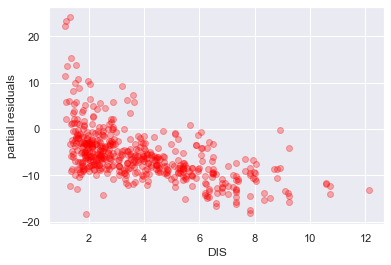

0.7406426641094095

In [50]:
var = 7
partial_residuals = residuals + X.iloc[:, var] * linreg.coef_[var]
plt.plot(X.iloc[:, var], partial_residuals, 'wo', c='red', alpha=0.3)
plt.xlabel(labels[var])
plt.ylabel('partial residuals')
plt.show()

r2_score(y, linreg.predict(X))

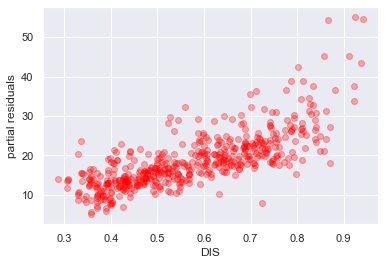

0.768907727254642

In [53]:
# inverse log implementation
X_t = X.copy()
X_t.iloc[:, var] = 1./np.sqrt(X_t.iloc[:, var])
linreg.fit(X_t, y)
partial_residuals = residuals + X_t.iloc[:, var] * linreg.coef_[var]
plt.plot(X_t.iloc[:, var], partial_residuals, 'wo', c='red', alpha=0.3)
plt.xlabel(labels[var])
plt.ylabel('partial residuals')
plt.show()

r2_score(y, linreg.predict(X_t))

We can see a 2.8% increase just by transforming the DIS column to inverse log! Isn't it great?

### Other transformations to try out on either single or all columns
- Logarithmic: np.log(X)
- Exponential: np.exp(X)
- Squared, Cubed: X^2, X^3
- Square root: np.sqrt(X)
- Cube Root: X^(1/3)
- Inverse: $\frac{1.}{X}$

"Some of the transformations suggested in the preceding table won’t work properly after
normalization or otherwise in the presence of zero and negative values: logarithmic
transformation needs positive values above zero, square root won’t work with negative
values, and inverse transformation won’t operate with zero values. Sometimes adding a
constant may help (like in the case of np.log(x+1)). Generally, just try the possible
transformations, according to your data values."
** Regression Analysis w/ Python (p. 225)